In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("D:/Projects/Capstone_Projects/Final project/Data Set.xlsx",sheet_name='Loan data')

In [3]:
(df.isnull().sum()/len(df))*100

Cutomer id      0.000000
Cards           0.895522
Debit card      3.059701
Insurance       3.582090
Age            14.104478
Cibil Score     0.000000
Loan offer      0.000000
dtype: float64

In [33]:
df.corr()

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
Cutomer id,1.000000,0.030946,0.042214,-0.009150,-0.002228,-0.049590,0.011717
Cards,0.030946,1.000000,0.065976,-0.016327,-0.023112,-0.028412,0.076564
Debit card,0.042214,0.065976,1.000000,0.019953,0.045772,0.004641,0.076631
Insurance,-0.009150,-0.016327,0.019953,1.000000,-0.025914,0.111879,-0.055848
Age,-0.002228,-0.023112,0.045772,-0.025914,1.000000,0.057887,0.012223
Cibil Score,-0.049590,-0.028412,0.004641,0.111879,0.057887,1.000000,-0.219715
Loan offer,0.011717,0.076564,0.076631,-0.055848,0.012223,-0.219715,1.000000


In [4]:
df.Age.mean()

28.414422241529106

In [5]:
df.Age.median()

30.0

In [6]:
df.Age = df.Age.fillna(df.Age.median())

In [7]:
df['Debit card'].mode()

0    1.0
Name: Debit card, dtype: float64

In [8]:
df.groupby('Age').agg({"Debit card": "median"}).reset_index()

,Age,Debit card
0,0.0,1.0
1,1.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0
...,...,...
63,83.0,1.0
64,84.0,1.0
65,86.0,1.0
66,88.0,1.0


In [9]:
# If No Debit cards then replacing it with 0
df['Debit card'] = df['Debit card'].fillna(1)

In [10]:
df.groupby('Loan offer').agg({"Cards": "median"}).reset_index()

,Loan offer,Cards
0,0,1.0
1,1,1.0


In [11]:
# If No cards then replacing it with 0
df.Cards = df.Cards.fillna(1)

In [12]:
df.groupby('Loan offer').agg({"Insurance": "median"}).reset_index()

,Loan offer,Insurance
0,0,0.0
1,1,0.0


In [13]:
# If No Insurance then replacing it with 0
df.Insurance = df.Insurance.fillna(0)

<Axes: xlabel='Age', ylabel='Density'>

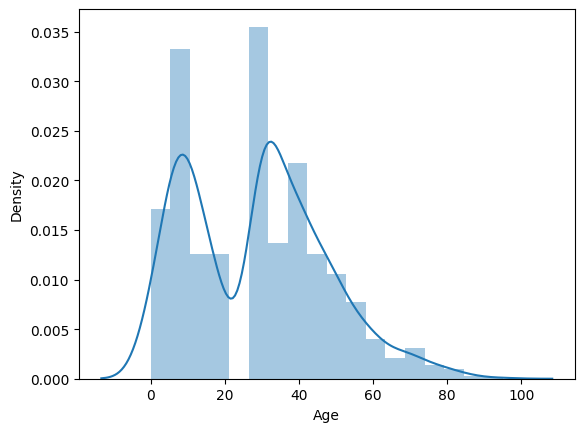

In [14]:
sns.distplot(df.Age)

In [15]:
(df.isnull().sum()/len(df))*100

Cutomer id     0.0
Cards          0.0
Debit card     0.0
Insurance      0.0
Age            0.0
Cibil Score    0.0
Loan offer     0.0
dtype: float64

In [16]:
X = df.iloc[:,[5,4,3,2,1]]

In [17]:
Y = df['Loan offer']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=42)

In [20]:
from sklearn import linear_model

In [21]:
mod = linear_model.LogisticRegression()

In [22]:
mod.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred = mod.predict(x_test)

In [24]:
mod.score(x_test,y_test)

0.7388059701492538

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       128
           1       0.72      0.81      0.76       140

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix
cm(y_test,y_pred)

array([[ 85,  43],
       [ 27, 113]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

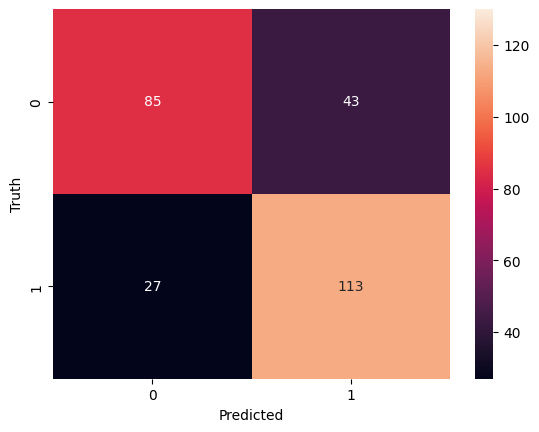

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
# plt.figure(figsize=(7,5))
sn.heatmap(cm(y_test,y_pred), annot=True, vmax=130, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7388059701492538

Text(0, 0.5, 'True Positive Rate')

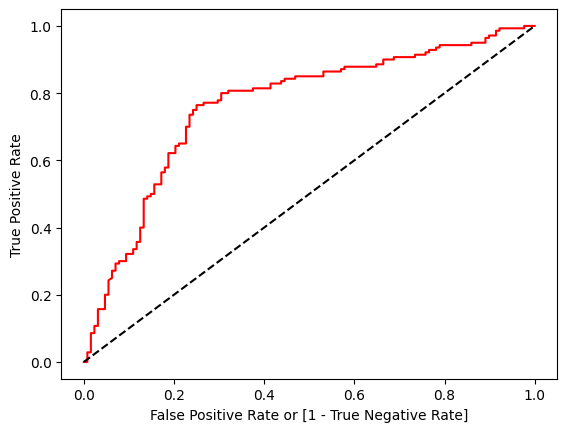

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc=roc_auc_score(y_test,y_pred)
fpr,tpr,threshold=roc_curve(y_test,mod.predict_proba(x_test)[0:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')    

In [30]:
def Loan_predict(cib,age,ins,deb,cards):
    x = [[cib,age,ins,deb,cards]]
    print(*mod.predict(x))

In [31]:
Loan_predict(0.405, 21, 0, 1, 0)

1
